In [1]:
import django
import pandas as pd
import seaborn as sns
django.setup()

In [2]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

from sch.models import *
import datetime as dt
from django.db.models import CharField
from django.test import RequestFactory
from sch.actions import *
from sch.views2 import *

In [3]:
shift = Shift.objects.get(name='MI')
all_mi_slots = list(Slot.objects.filter(shift=shift).values_list('employee__name',flat=True))
print(
    "All MI Slots\n",
    all_mi_slots
)

mi_tallies = tally(all_mi_slots)
print (
    "\n======TALLIES======\n",
    sortDict(mi_tallies)
)

All MI Slots
 [None, 'Sabrina', 'Elisia', 'Sabrina', 'Cheryl', 'Leslie', 'Tiffany', 'Cheryl', 'Tiffany', 'Elisia', 'Elisia', 'Josh', 'Elisia', None, None, 'Tiffany', 'Tiffany', 'David', 'David', 'David', 'Cheryl', 'Cheryl', 'Tiffany', 'Elisia', 'Elisia', 'Elisia', 'Elisia', 'David', None, 'Sabrina', 'Elisia', 'Elisia', 'Trisha', 'Josh', 'Cheryl', 'Tiffany', 'David', 'Sabrina', 'Cheryl', 'Esperanza', 'Cheryl', 'Sabrina', 'David', 'Leslie', 'Josh', 'Leslie', 'Elisia', 'Elisia', None, 'Tiffany', 'David', 'Leslie', 'Cheryl', 'Cheryl', 'Elisia', None, 'Elisia', 'Elisia', 'Elisia', 'Cheryl', 'David', 'Elisia', None, 'Sabrina', 'David', 'David', 'Leslie', 'Cheryl', 'David', 'Elisia', None, 'Tiffany', 'Josh', 'Elisia', 'David', 'David', 'Trisha', 'Cheryl', 'Cheryl', 'Elisia', 'Cheryl', 'David', 'Elisia', None, 'David', 'David', 'Leslie', 'Leslie', 'Sabrina', 'Josh', 'Josh', 'Trisha', 'Elisia', 'David', 'Cheryl', 'David', 'David', 'David', 'Tiffany', 'Josh', 'Leslie', 'David', 'Cheryl', 'Cheryl

In [6]:
df = pd.DataFrame.from_dict(sortDict(mi_tallies,reverse=True), orient='index', columns=['count'])
df

,count
Elisia,37
David,35
Cheryl,30
None,11
Sabrina,11
Leslie,11
Josh,11
Tiffany,9
Trisha,7
Jaden,5


interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

array([<AxesSubplot:ylabel='count'>], dtype=object)

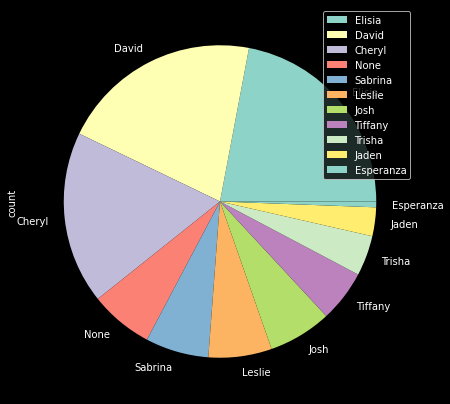

In [11]:
sns.set_theme()
df.plot(kind='pie',subplots=True,figsize=(7,10))